In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from geopandas import GeoDataFrame
from shapely.geometry import Point,Polygon
#from contextily import add_basemap

import geopandas as gpd
import descartes
%matplotlib inline

In [9]:
df = pd.read_csv('C:/Users/Huang/SA/semesterarbeit/Taxi_Trips.csv',usecols=['Trip Start Timestamp','Trip Seconds','Trip Miles','Pickup Community Area' ,'Dropoff Community Area','Pickup Centroid Latitude','Pickup Centroid Longitude','Dropoff Centroid Latitude','Dropoff Centroid Longitude'])
df.dropna(subset=['Trip Start Timestamp','Pickup Community Area', 'Dropoff Community Area'],
          axis=0, # axis=0表示删除行；
          how='any', # how=any表示任意一个出现空值，就删掉该行
          inplace=True # inplace=True表示在原df上进行修改；
          )

df["start"]=df["Trip Start Timestamp"].map(lambda x:x.split(" ")[0])
df["start"]=pd.to_datetime(df["start"], format='%m/%d/%Y')
df["number of weeks"] =  df["start"].dt.isocalendar().week
df=df[["Pickup Community Area","Dropoff Community Area",'Pickup Centroid Latitude','Pickup Centroid Longitude','Dropoff Centroid Latitude','Dropoff Centroid Longitude',"start","number of weeks"]]


C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\IPython\core\interactiveshell.py:3552: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
df.columns=["O_Area","D_Area","O_Latitude","O_Longitude","D_Latitude","D_Longitude","start","number of weeks"]

In [11]:
df["year"]=df["start"].dt.isocalendar().year
df["num_weeks"]=df["number of weeks"]+(df["year"]-2019)*52
count=df['num_weeks'].value_counts()
x=list(range(1,201))
count_week=[]
for i in range(1,201):
    count_week.append(count[i])

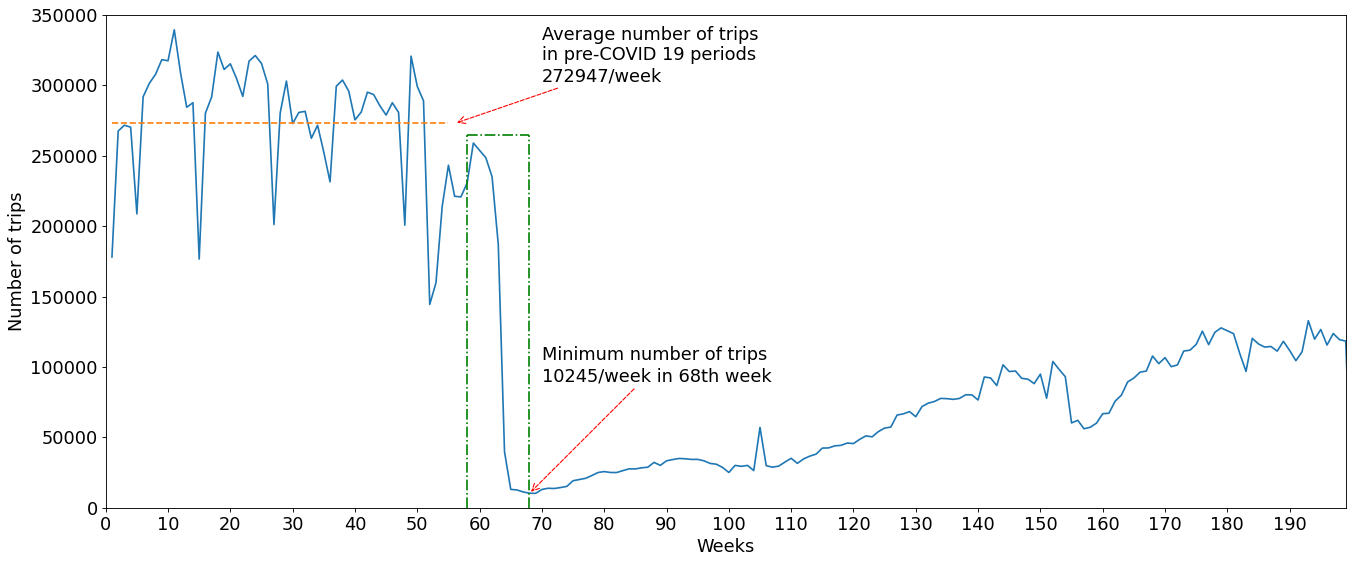

In [53]:
average_trips=np.mean(count_week[:60])
bottom=np.min(count_week[60:75])
for i in range(60,76):
    if count_week[i]==bottom:
        bottom_week=i
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count_week)
plt.annotate("Minimum number of trips \n%.5s/week in 68th week"%bottom, xy = (bottom_week, bottom), xytext= (70, 90000),color = "k", fontsize=16,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.annotate("Average number of trips \nin pre-COVID 19 periods \n%.6s/week"%average_trips, xy = (56, average_trips), xytext= (70, average_trips+30000),color = "k", fontsize=16,arrowprops = dict(arrowstyle="->",linestyle="--",color = "r"))
plt.plot(list(range(1,56)),np.ones(55)*average_trips,linestyle="--")
xdata1 = 58*np.ones(40)
y1 = np.linspace(0, 265000, 40)
xdata2 = 68*np.ones(40)
y2 = np.linspace(0, 265000, 40)
xdata3 = np.linspace(58, 68, 40)
y3 = 265000*np.ones(40)
plt.plot(xdata1, y1, 'g-.')
plt.plot(xdata2, y2, 'g-.')
plt.plot(xdata3, y3, 'g-.')
x_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.ylim(0,350000)
plt.xlim(0,199)
#plt.title('OD demand for Chicago taxi trips per week ',fontsize=16,fontweight='bold')
plt.xlabel('Weeks',fontsize=16)
plt.ylabel('Number of trips',fontsize=16)
plt.tick_params(labelsize=16)

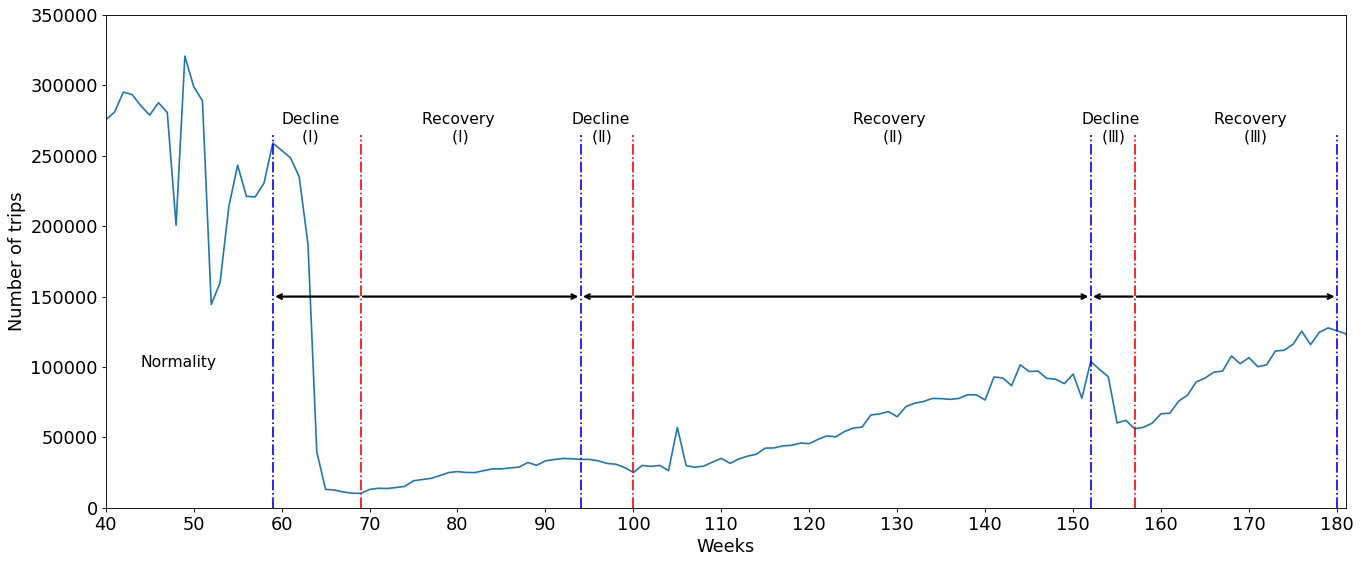

In [115]:
plt.figure(figsize=(20,8),dpi=80)
plt.plot(x,count_week)

xdata1 = 59*np.ones(40)
y1 = np.linspace(0, 265000, 40)
xdata2 = 69*np.ones(40)
y2 = np.linspace(0, 265000, 40)
xdata3 = 94*np.ones(40)
y3 = np.linspace(0, 265000, 40)
xdata4 = 100*np.ones(40)
y4 = np.linspace(0, 265000, 40)
xdata5 = 152*np.ones(40)
y5 = np.linspace(0, 265000, 40)
xdata6 = 157*np.ones(40)
y6 = np.linspace(0, 265000, 40)
xdata7 = 180*np.ones(40)
y7 = np.linspace(0, 265000, 40)
plt.plot(xdata1, y1, 'b-.')
plt.plot(xdata2, y2, 'r-.')
plt.plot(xdata3, y3, 'b-.')
plt.plot(xdata4, y4, 'r-.')
plt.plot(xdata5, y5, 'b-.')
plt.plot(xdata6, y6, 'r-.')
plt.plot(xdata7, y7, 'b-.')
plt.annotate('',xy=(59,150000),xytext= (69, 150000),arrowprops = dict(arrowstyle="->",linestyle="-",linewidth=2,color = "k"))
plt.annotate('',xy=(94,150000),xytext= (69, 150000),arrowprops = dict(arrowstyle="->",linestyle="-",linewidth=2,color = "k"))
plt.annotate('',xy=(94,150000),xytext= (100, 150000),arrowprops = dict(arrowstyle="->",linestyle="-",linewidth=2,color = "k"))
plt.annotate('',xy=(152,150000),xytext= (100, 150000),arrowprops = dict(arrowstyle="->",linestyle="-",linewidth=2,color = "k"))
plt.annotate('',xy=(152,150000),xytext= (157, 150000),arrowprops = dict(arrowstyle="->",linestyle="-",linewidth=2,color = "k"))
plt.annotate('',xy=(180,150000),xytext= (157, 150000),arrowprops = dict(arrowstyle="->",linestyle="-",linewidth=2,color = "k"))

plt.annotate("Normality",  xy = (44,100000),xytext= (44,100000),color = "k", fontsize=14)
plt.annotate("Decline\n    (Ⅰ)",  xy = (60,260000),xytext= (60,260000),color = "k", fontsize=14)
plt.annotate("Recovery \n      (Ⅰ)",  xy = (76,260000),xytext= (76,260000),color = "k", fontsize=14)
plt.annotate("Decline\n    (Ⅱ)",  xy = (93,260000),xytext= (93,260000),color = "k", fontsize=14)
plt.annotate("Recovery \n      (Ⅱ)",  xy = (125,260000),xytext= (125,260000),color = "k", fontsize=14)
plt.annotate("Decline\n    (Ⅲ)",  xy = (151,260000),xytext= (151,260000),color = "k", fontsize=14)
plt.annotate("Recovery \n      (Ⅲ)",  xy = (166,260000),xytext= (166,260000),color = "k", fontsize=14)

x_major_locator=MultipleLocator(10)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.ylim(0,350000)
plt.xlim(40,181)
plt.xlabel('Weeks',fontsize=16)
plt.ylabel('Number of trips',fontsize=16)
plt.tick_params(labelsize=16)

In [54]:
from matplotlib.pyplot import MultipleLocator

In [55]:
count_week[57:69]

[230649,
 259050,
 253793,
 248624,
 235127,
 187022,
 39759,
 13074,
 12650,
 11242,
 10343,
 10245]

Text(0, 0.5, 'Number of trips')

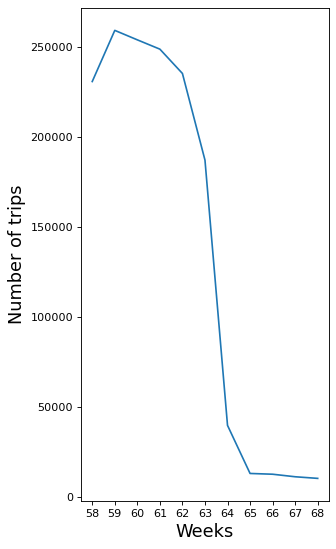

In [56]:
plt.figure(figsize=(4,8),dpi=80)
plt.plot(x[57:68],count_week[57:68])
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlabel('Weeks',fontsize=16)
plt.ylabel('Number of trips',fontsize=16)

In [3]:
chicago_area

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."
...,...,...,...,...,...,...,...,...,...,...
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706..."
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685..."
74,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998..."


In [59]:
df59=df[df["num_weeks"]==59]
df60=df[df["num_weeks"]==60]
df61=df[df["num_weeks"]==61]
df62=df[df["num_weeks"]==62]
df63=df[df["num_weeks"]==63]
df64=df[df["num_weeks"]==64]
df65=df[df["num_weeks"]==65]


In [60]:
count_OArea59=df59['O_Area'].value_counts()
count_DArea59=df59['D_Area'].value_counts()
count_OArea60=df60['O_Area'].value_counts()
count_DArea60=df60['D_Area'].value_counts()
count_OArea61=df61['O_Area'].value_counts()
count_DArea61=df61['D_Area'].value_counts()
count_OArea62=df62['O_Area'].value_counts()
count_DArea62=df62['D_Area'].value_counts()
count_OArea63=df63['O_Area'].value_counts()
count_DArea63=df63['D_Area'].value_counts()
count_OArea64=df64['O_Area'].value_counts()
count_DArea64=df64['D_Area'].value_counts()
count_OArea65=df65['O_Area'].value_counts()
count_DArea65=df65['D_Area'].value_counts()
#count_OArea66=df66['O_Area'].value_counts()
#count_DArea66=df66['D_Area'].value_counts()

In [61]:
chicago_area = gpd.read_file('geo_export_4c471519-04c7-42ca-bbd4-6e12d8766916.shp')
chicago_area["area_numbe"]=chicago_area["area_numbe"].astype(int)

In [62]:
chicago_area['O_num']=0
chicago_area['D_num']=0
chicago_area['O_num60']=0
chicago_area['D_num60']=0
chicago_area['O_num61']=0
chicago_area['D_num61']=0
chicago_area['O_num62']=0
chicago_area['D_num62']=0
chicago_area['O_num63']=0
chicago_area['D_num63']=0
chicago_area['O_num64']=0
chicago_area['D_num64']=0
chicago_area['O_num65']=0
chicago_area['D_num65']=0
#chicago_area['O_num66']=0
#chicago_area['D_num66']=0

In [63]:
for i in range(0,77): 
    n=chicago_area["area_numbe"][i]
    chicago_area['O_num'][i]=count_OArea59[count_OArea59.index==n]
    chicago_area['D_num'][i]=count_DArea59[count_DArea59.index==n]
    
    chicago_area['O_num60'][i]=100*count_OArea60[count_OArea60.index==n]/chicago_area['O_num'][i]-100
    chicago_area['D_num60'][i]=100*count_DArea60[count_DArea60.index==n]/chicago_area['D_num'][i]-100
    chicago_area['O_num61'][i]=100*count_OArea61[count_OArea61.index==n]/chicago_area['O_num'][i]-100
    chicago_area['D_num61'][i]=100*count_DArea61[count_DArea61.index==n]/chicago_area['D_num'][i]-100
    chicago_area['O_num62'][i]=100*count_OArea62[count_OArea62.index==n]/chicago_area['O_num'][i]-100
    chicago_area['D_num62'][i]=100*count_DArea62[count_DArea62.index==n]/chicago_area['D_num'][i]-100
    chicago_area['O_num63'][i]=100*count_OArea63[count_OArea63.index==n]/chicago_area['O_num'][i]-100
    chicago_area['D_num63'][i]=100*count_DArea63[count_DArea63.index==n]/chicago_area['D_num'][i]-100
    chicago_area['O_num64'][i]=100*count_OArea64[count_OArea64.index==n]/chicago_area['O_num'][i]-100
    chicago_area['D_num64'][i]=100*count_DArea64[count_DArea64.index==n]/chicago_area['D_num'][i]-100
    chicago_area['O_num65'][i]=100*count_OArea65[count_OArea65.index==n]/chicago_area['O_num'][i]-100
    chicago_area['D_num65'][i]=100*count_DArea65[count_DArea65.index==n]/chicago_area['D_num'][i]-100
    #chicago_area['O_num66'][i]=100*count_OArea66[count_OArea66.index==n]/chicago_area['O_num'][i]-100
    #chicago_area['D_num66'][i]=100*count_DArea66[count_DArea66.index==n]/chicago_area['D_num'][i]-100
chicago_area

C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,...,O_num61,D_num61,O_num62,D_num62,O_num63,D_num63,O_num64,D_num64,O_num65,D_num65
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",...,-4,-7,-5,-20,-18,-24,-52,-63,-67,-76
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",...,28,15,25,13,18,4,-35,-49,-62,-74
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",...,60,11,33,26,40,0,-5,-42,-41,-70
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",...,5,-3,12,-2,1,-10,-33,-50,-55,-67
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",...,9,3,2,-9,-7,-14,-50,-63,-72,-80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706...",...,33,16,113,52,26,8,-20,-36,-60,-84
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",...,-3,13,-20,6,-6,13,-49,-52,-71,-75
74,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",...,0,0,-14,-1,-46,-46,-86,-86,-97,-96
75,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",...,2,4,1,-2,-6,-12,-52,-63,-76,-81


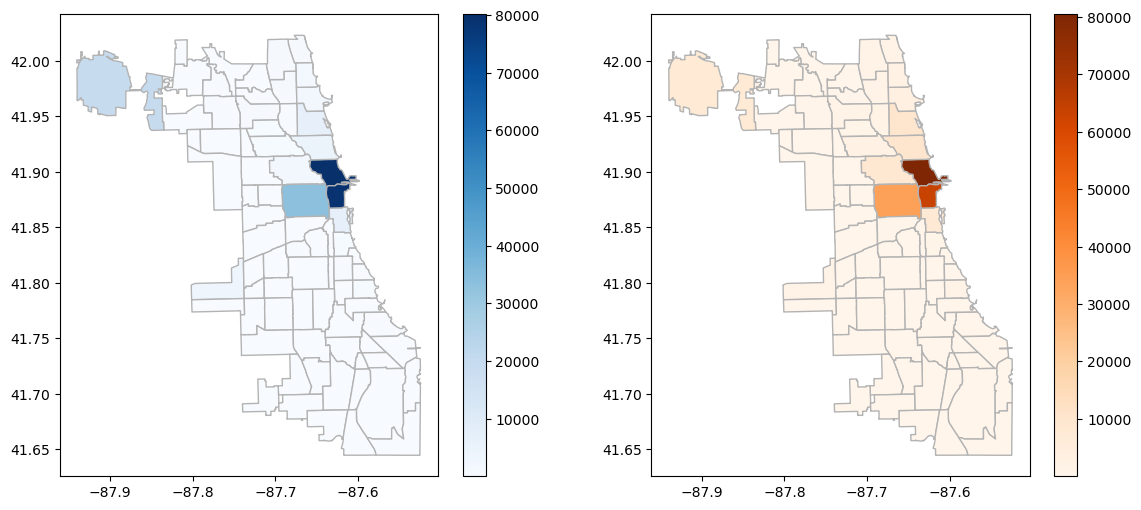

In [213]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(14,6))
chicago_area.plot(column="O_num",ax=axes[0], cmap='Blues',linewidth=1, edgecolor='0.7', legend = True)
chicago_area.plot(column="D_num",ax=axes[1],cmap='Oranges',linewidth=1, edgecolor='0.7', legend = True)

In [51]:
from matplotlib import colors

Text(1025.302747561183, 0.5, 'Latitude')

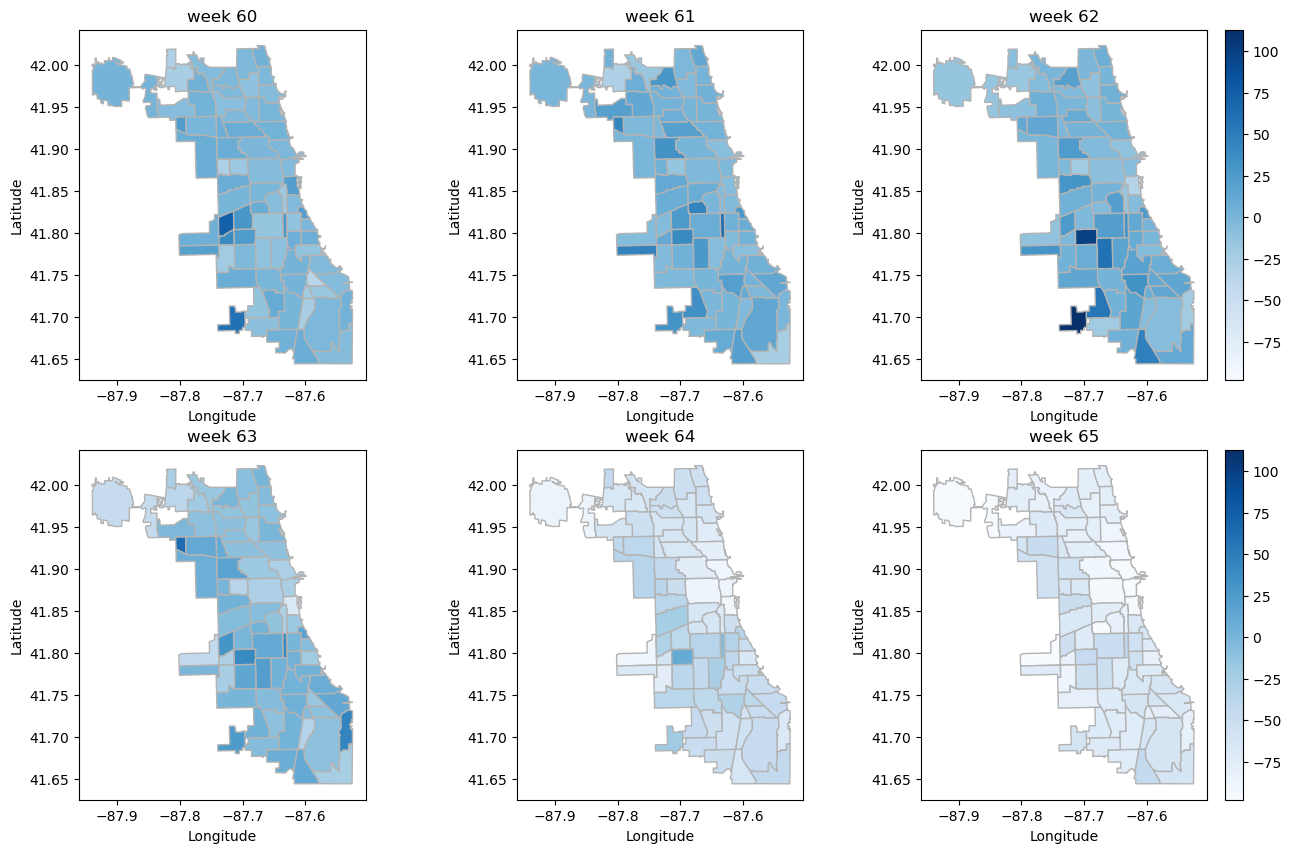

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(16,10))
vmin=min(np.min(chicago_area["O_num60"]),np.min(chicago_area["O_num61"]),np.min(chicago_area["O_num62"]),np.min(chicago_area["O_num63"]),np.min(chicago_area["O_num64"]),np.min(chicago_area["O_num65"]))
vmax=max(np.max(chicago_area["O_num60"]),np.max(chicago_area["O_num61"]),np.max(chicago_area["O_num62"]),np.max(chicago_area["O_num63"]),np.max(chicago_area["O_num64"]),np.max(chicago_area["O_num65"]))
norm = colors.Normalize(vmin=vmin,vmax=vmax)
chicago_area.plot(column="O_num60", ax=axes[0,0],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="O_num61", ax=axes[0,1],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="O_num62", ax=axes[0,2],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = True)
chicago_area.plot(column="O_num63", ax=axes[1,0],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="O_num64", ax=axes[1,1],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="O_num65", ax=axes[1,2],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = True)
#chicago_area.plot(column="O_num66", ax=axes[2,1],cmap='YlGnBu',linewidth=1,norm=norm, edgecolor='0.7', legend = True)
axes[0,0].set_title("week 60")
axes[0,1].set_title("week 61")
axes[0,2].set_title("week 62")
axes[1,0].set_title("week 63")
axes[1,1].set_title("week 64")
axes[1,2].set_title("week 65")

axes[0,0].set_xlabel("Longitude")
axes[0,1].set_xlabel("Longitude")
axes[0,2].set_xlabel("Longitude")
axes[1,0].set_xlabel("Longitude")
axes[1,1].set_xlabel("Longitude")
axes[1,2].set_xlabel("Longitude")

axes[0,0].set_ylabel("Latitude")
axes[0,1].set_ylabel("Latitude")
axes[0,2].set_ylabel("Latitude")
axes[1,0].set_ylabel("Latitude")
axes[1,1].set_ylabel("Latitude")
axes[1,2].set_ylabel("Latitude")
#cbar=fig.colorbar(mpl.cm.ScalarMappable(norm=norm,cmap="GnBu"),ax=axes[0,1])


In [73]:
import heapq
from pandas.core.frame import DataFrame
import math

In [74]:
origin={'start_lng':df60["O_Longitude"],
        'start_lat':df60["O_Latitude"],
}
origin=DataFrame(origin)
destination={
        'end_lng':df60["D_Longitude"],
        'end_lat':df60["D_Latitude"],
}
destination=DataFrame(destination)

In [75]:
o_geometry = [Point(xy) for xy in zip(origin.start_lng, origin.start_lat)]
d_geometry = [Point(xy) for xy in zip(destination.end_lng, destination.end_lat)]

In [76]:
crs = {'init':'epsg:4326'}
geo_o_geometry = gpd.GeoDataFrame(origin,
                         crs=crs,
                         geometry = o_geometry)
geo_d_geometry = gpd.GeoDataFrame(destination,
                         crs=crs,
                         geometry = d_geometry)

C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\pyproj\crs\crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [77]:
geo_o_geometry

,start_lng,start_lat,geometry
21557115,-87.667569,41.850266,POINT (-87.66757 41.85027)
21558141,-87.572782,41.761578,POINT (-87.57278 41.76158)
21560886,-87.618678,41.835118,POINT (-87.61868 41.83512)
21561626,-87.632746,41.880994,POINT (-87.63275 41.88099)
21562508,-87.620993,41.884987,POINT (-87.62099 41.88499)
...,...,...,...
23730868,-87.633308,41.899602,POINT (-87.63331 41.89960)
23730869,-87.913625,41.980264,POINT (-87.91362 41.98026)
23730876,-87.626215,41.892508,POINT (-87.62621 41.89251)
23730881,-87.637844,41.893216,POINT (-87.63784 41.89322)


Degree centrality

In [78]:
chicago_area = gpd.read_file('geo_export_4c471519-04c7-42ca-bbd4-6e12d8766916.shp')
chicago_area["area_numbe"]=chicago_area["area_numbe"].astype(int)

In [79]:
chicago_area['degree60']=0.0
chicago_area['degree61']=0.0
chicago_area['degree62']=0.0
chicago_area['degree63']=0.0
chicago_area['degree64']=0.0
chicago_area['degree65']=0.0

In [80]:
od_list60=df60['O_Area'].groupby(df60['D_Area']).value_counts()
od_list61=df61['O_Area'].groupby(df61['D_Area']).value_counts()
od_list62=df62['O_Area'].groupby(df62['D_Area']).value_counts()
od_list63=df63['O_Area'].groupby(df63['D_Area']).value_counts()
od_list64=df64['O_Area'].groupby(df64['D_Area']).value_counts()
od_list65=df65['O_Area'].groupby(df65['D_Area']).value_counts()

In [81]:
od_list65.index[1][1]

77.0

In [82]:
len(od_list65.index)

1732

In [83]:
for i in range(0,77): 
    n=chicago_area["area_numbe"][i]
    sum60=0
    sum61=0
    sum62=0
    sum63=0
    sum64=0
    sum65=0
    for k in range(0,len(od_list60)):
        if od_list60.index[k][0]==n or od_list60.index[k][1]==n:
            sum60=sum60+od_list60[od_list60.index[k]]
    for k in range(0,len(od_list61)):
        if od_list61.index[k][0]==n or od_list61.index[k][1]==n:
            sum61=sum61+od_list61[od_list61.index[k]]
    for k in range(0,len(od_list62)):
        if od_list62.index[k][0]==n or od_list62.index[k][1]==n:
            sum62=sum62+od_list62[od_list62.index[k]]
    for k in range(0,len(od_list63)):
        if od_list63.index[k][0]==n or od_list63.index[k][1]==n:
            sum63=sum63+od_list63[od_list63.index[k]]
    for k in range(0,len(od_list64)):
        if od_list64.index[k][0]==n or od_list64.index[k][1]==n:
            sum64=sum64+od_list64[od_list64.index[k]]
    for k in range(0,len(od_list65)):
        if od_list65.index[k][0]==n or od_list65.index[k][1]==n:
            sum65=sum65+od_list65[od_list65.index[k]]
    chicago_area['degree60'][i]=math.log(sum60)
    chicago_area['degree61'][i]=math.log(sum61)
    chicago_area['degree62'][i]=math.log(sum62)
    chicago_area['degree63'][i]=math.log(sum63)
    chicago_area['degree64'][i]=math.log(sum64)
    chicago_area['degree65'][i]=math.log(sum65)

C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Huang\anaconda3\envs\aiauto\lib\site-packages\ipykernel

In [84]:
chicago_area

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry,degree60,degree61,degree62,degree63,degree64,degree65
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",7.208600,7.295056,7.197435,7.111512,6.453625,6.003887
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",5.746203,5.777652,5.758902,5.707110,5.017280,4.430817
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",5.257495,5.365976,5.370638,5.283204,4.744932,4.204693
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816...",6.647688,6.767343,6.804615,6.727432,6.200509,5.774552
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816...",6.824374,6.918695,6.825460,6.727432,5.988961,5.365976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.0,74,74,0.0,0.0,MOUNT GREENWOOD,0.0,7.558429e+07,48665.130539,"POLYGON ((-87.69646 41.70714, -87.69644 41.706...",4.043051,3.828641,4.077537,3.761200,3.258097,2.302585
73,0.0,75,75,0.0,0.0,MORGAN PARK,0.0,9.187734e+07,46396.419362,"POLYGON ((-87.64215 41.68508, -87.64249 41.685...",5.505332,5.541264,5.402677,5.513429,4.736198,4.204693
74,0.0,76,76,0.0,0.0,OHARE,0.0,3.718356e+08,173625.984660,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",10.217568,10.147766,10.031309,9.508962,8.048469,6.508769
75,0.0,77,77,0.0,0.0,EDGEWATER,0.0,4.844999e+07,31004.830946,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",8.274357,8.361708,8.315566,8.199739,7.372746,6.655440


Text(1423.3766339869283, 0.5, 'Latitude')

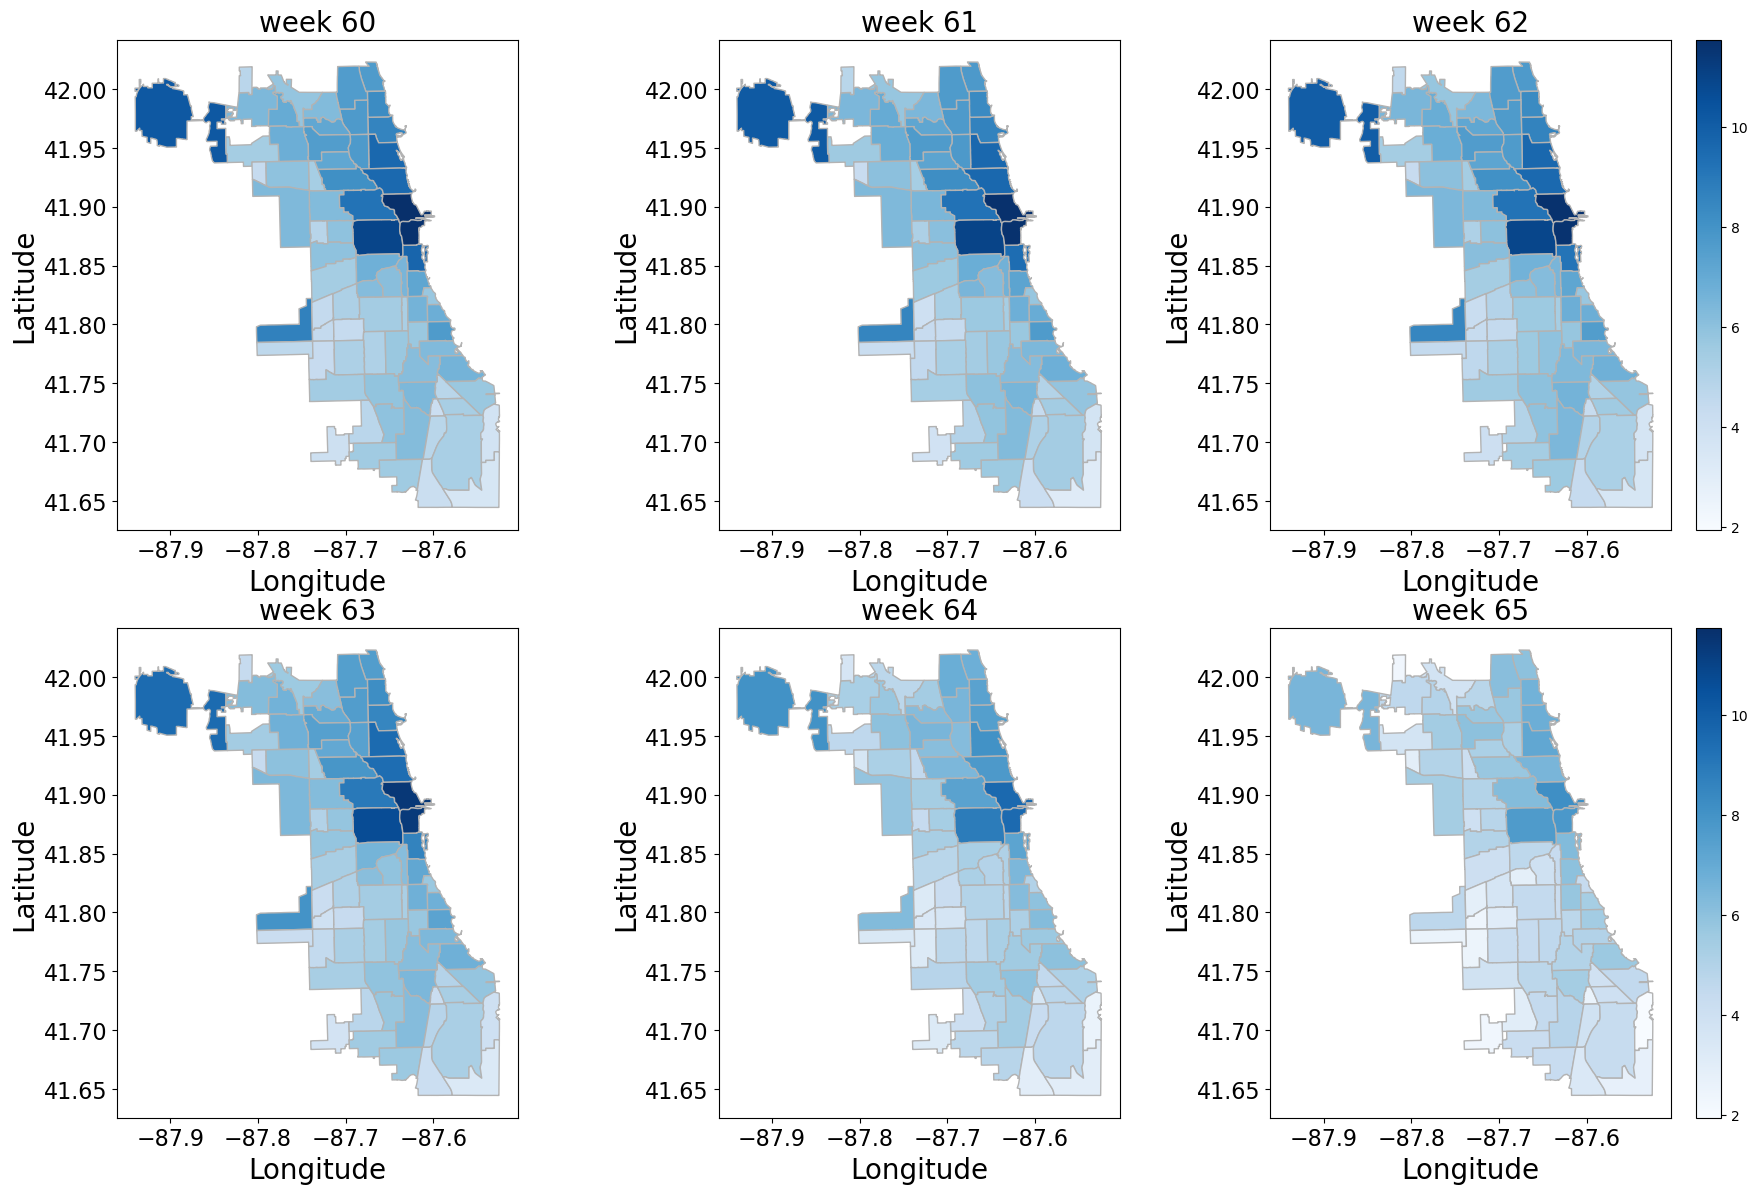

In [85]:
fig, axes = plt.subplots(nrows=2, ncols=3,figsize=(22,14))
vmin=min(np.min(chicago_area["degree60"]),np.min(chicago_area["degree61"]),np.min(chicago_area["degree62"]),np.min(chicago_area["degree63"]),np.min(chicago_area["degree64"]),np.min(chicago_area["degree65"]))
vmax=max(np.max(chicago_area["degree60"]),np.max(chicago_area["degree61"]),np.max(chicago_area["degree62"]),np.max(chicago_area["degree63"]),np.max(chicago_area["degree64"]),np.max(chicago_area["degree65"]))
norm = colors.Normalize(vmin=vmin,vmax=vmax)
chicago_area.plot(column="degree60", ax=axes[0,0],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="degree61", ax=axes[0,1],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="degree62", ax=axes[0,2],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = True)
chicago_area.plot(column="degree63", ax=axes[1,0],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="degree64", ax=axes[1,1],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = False)
chicago_area.plot(column="degree65", ax=axes[1,2],cmap='Blues',linewidth=1,norm=norm, edgecolor='0.7', legend = True)
axes[0,0].set_title("week 60",fontsize=20)
axes[0,1].set_title("week 61",fontsize=20)
axes[0,2].set_title("week 62",fontsize=20)
axes[1,0].set_title("week 63",fontsize=20)
axes[1,1].set_title("week 64",fontsize=20)
axes[1,2].set_title("week 65",fontsize=20)

axes[0,0].set_xlabel("Longitude",fontsize=20)
axes[0,1].set_xlabel("Longitude",fontsize=20)
axes[0,2].set_xlabel("Longitude",fontsize=20)
axes[1,0].set_xlabel("Longitude",fontsize=20)
axes[1,1].set_xlabel("Longitude",fontsize=20)
axes[1,2].set_xlabel("Longitude",fontsize=20)

axes[0,0].tick_params(labelsize=16)
axes[0,1].tick_params(labelsize=16)
axes[0,2].tick_params(labelsize=16)
axes[1,0].tick_params(labelsize=16)
axes[1,1].tick_params(labelsize=16)
axes[1,2].tick_params(labelsize=16)


axes[0,0].set_ylabel("Latitude",fontsize=20)
axes[0,1].set_ylabel("Latitude",fontsize=20)
axes[0,2].set_ylabel("Latitude",fontsize=20)
axes[1,0].set_ylabel("Latitude",fontsize=20)
axes[1,1].set_ylabel("Latitude",fontsize=20)
axes[1,2].set_ylabel("Latitude",fontsize=20)